In [ ]:
import numpy as np
import pandas as pd
from b import BeautifulSoup
import requests
from b import SoupStrainer
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Q1 (stock prices)

URL https://markets.businessinsider.com/stocks/goog-stock

In [69]:
r_stock = requests.get("https://markets.businessinsider.com/stocks/goog-stock")

In [70]:
r_stock

<Response [200]>

In [71]:
soup = BeautifulSoup(r_stock.text, "html.parser")

In [80]:
price_row = soup.select("span.price-section__current-value")[0]
price_row

<span class="price-section__current-value">2,872.85</span>

In [81]:
price = price_row.get_text()
price

'2,872.85'

## Q2 (weather data)

Using https://www.timeanddate.com/weather/usa/philadelphia/ext

getting the "feels like" temperatures for Philadelphia for the next 14 days

In [95]:
r_weather = requests.get("https://www.timeanddate.com/weather/usa/philadelphia/ext")

In [96]:
r_weather

<Response [200]>

In [97]:
soup_weather = BeautifulSoup(r_weather.text, "html.parser")
#soup_weather

In [98]:
days = np.arange(1,15)

In [99]:
#scrape temps
temps = []
temp_weather = soup_weather.find_all("td", class_ = 'sep')[3:45:3]
for temp in temp_weather:
  temps.append(int(temp.text[0:2]))

#convert if celsius
if str(temp_weather[0]).find("C") > -1:
  temps = (np.array(temps) * 1.8) + 32

In [100]:
weather_df = pd.DataFrame({"Time" : days, "Feels like Temperature" : temps})

In [101]:
weather_df 

,Time,Feels like Temperature
0,1,52
1,2,55
2,3,52
3,4,57
4,5,49
5,6,48
6,7,65
7,8,66
8,9,59
9,10,61


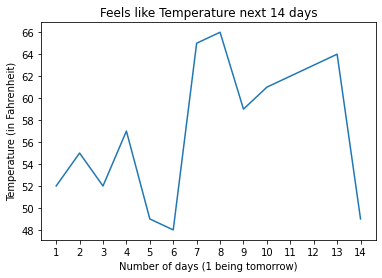

In [102]:
x = weather_df["Time"]
y = weather_df["Feels like Temperature"]
plt.yticks(np.arange(min(weather_df["Feels like Temperature"]),max(weather_df["Feels like Temperature"]) + 2,2))
plt.xticks(np.arange(1,15,1))
plt.plot(x,y);
plt.xlabel("Number of days (1 being tomorrow)")
plt.ylabel("Temperature (in Fahrenheit)")
plt.title("Feels like Temperature next 14 days");

## Q3 (Wikipedia - Countries and their capitals)

Getting the name of a capital by scraping wikipedia page.

In [89]:
def get_capital_from_wiki(country_name):
  r_city = requests.get("https://en.wikipedia.org/wiki/" + country_name)
  soup_city = BeautifulSoup(r_city.text, "html.parser")
  firstclass_capital = soup_city.find_all("td", class_ = 'infobox-data')
  capital_row = firstclass_capital[0]
  return capital_row.find("a").text

Proof:

In [90]:
get_capital_from_wiki("Lesotho")

'Maseru'